c:\Users\thijsmas\AppData\Local\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


D:/thijsmas/HSC - Ladisk\0_nad_1.cihx


c:\Users\thijsmas\AppData\Local\anaconda3\Lib\site-packages\pyMRAW.py:103: UserWarning: Clipped footage! (Total frame: 40000, Original total frame: 77663)
  warnings.warn('Clipped footage! (Total frame: {}, Original total frame: {})'.format(cih['Total Frame'], cih['Original Total Frame'] ))


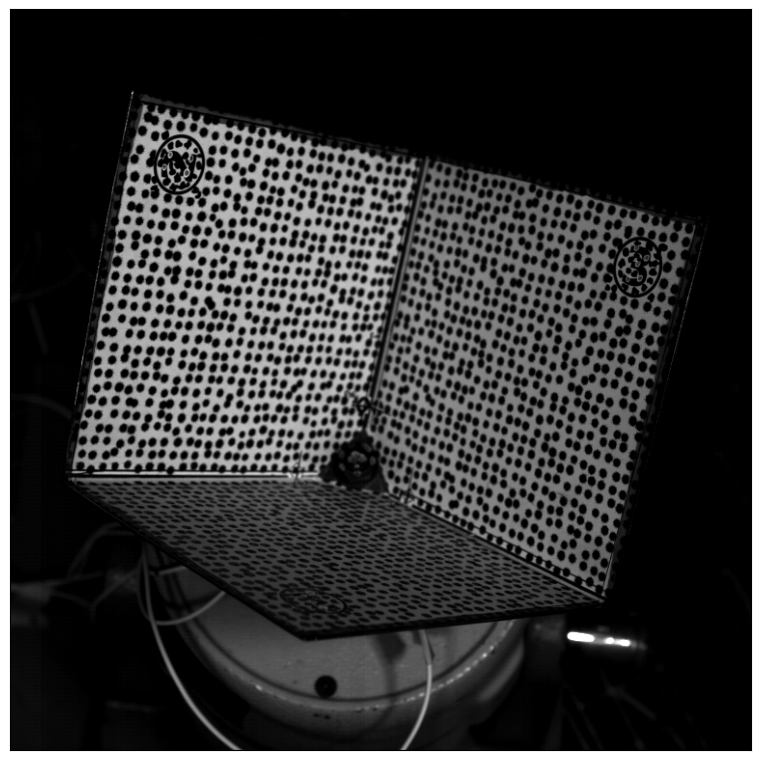

{'Date': '2021/6/21',
 'Camera Type': 'FASTCAM SA-Z type 2100K-M-64GB',
 'Record Rate(fps)': 20000.0,
 'Shutter Speed(s)': 20664.0,
 'Total Frame': 40000,
 'Original Total Frame': 77663,
 'Image Width': 768,
 'Image Height': 768,
 'File Format': 'Mraw',
 'EffectiveBit Depth': 12,
 'EffectiveBit Side': 'Higher',
 'Color Bit': 16,
 'Comment Text': ''}

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from Feature_selecter import FeatureSelecter
from EMA_functions import *

file_name = "0_nad_1.cihx"   #"Full_web_ecc2_new_Floc7_v0"        # Second attempt, ecc2
EMA_structure = EMA_Structure(file_name)
video = EMA_structure.open_video(add_extension = False)
reference_image = (0, 100)#(0, 100)
bit_depth = 16

fig, ax = EMA_structure.plot_still_frame(video, reference_image)
mean_image = EMA_structure.mean_image
video.info

In [2]:
feature_selecter = FeatureSelecter(mean_image)
feature_selecter.set_roi_size((11,11,2))
# feature_selecter.set_theta(90)
feature_selecter.set_filter_method('eig0')
# feature_selecter.plot_image()
# feature_selecter.plot_gradient()

Available filter methods: eig0, harris, trigs, harmonic_mean, eig_theta eig_theta_off


c:\Users\thijsmas\Documents\GitHub\pyidi\Feature_selecter.py:180: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (Array(float64, 1, 'A', False, aligned=True), Array(float64, 1, 'A', False, aligned=True))
  ATA00 = pixel_list[::2] @ pixel_list[::2]  # equivalent to ATA[0, 0]


[]

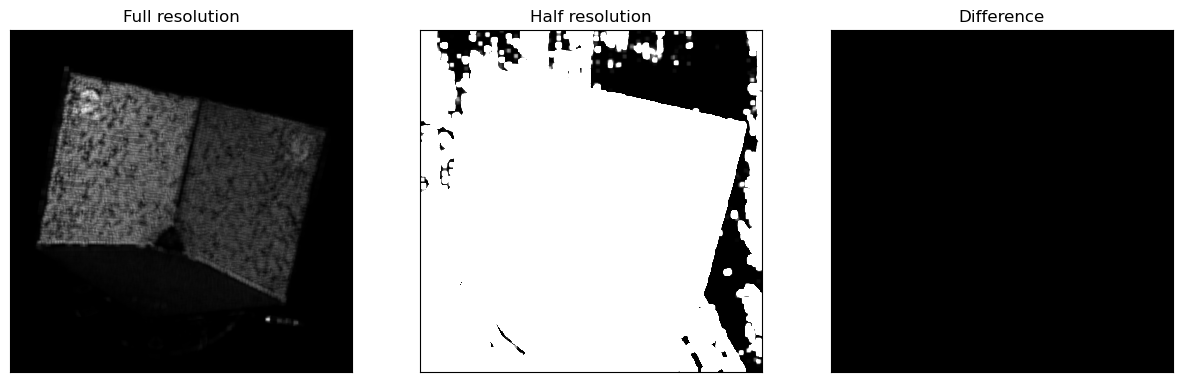

In [3]:
# feature_selecter.set_filter_method('trigs')
score_full = feature_selecter.apply_filter(downsample=1)
score_full /= np.max(score_full)
score_partial = feature_selecter.apply_filter(downsample=2)
score_partial /= np.max(score_full)
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].imshow(score_full, cmap='gray', vmin=0, vmax=1)
ax[0].set_title('Full resolution')
ax[0].set_xticks([])
ax[0].set_yticks([])
ax[1].imshow(score_partial, cmap='gray', vmin=0, vmax=1)
ax[1].set_title('Half resolution')
ax[1].set_xticks([])
ax[1].set_yticks([])
ax[2].imshow(score_full - score_partial, cmap='gray', vmin=0, vmax=1)
ax[2].set_title('Difference')
ax[2].set_xticks([])
ax[2].set_yticks([])


TypeError: Invalid shape (768, 768, 2) for image data

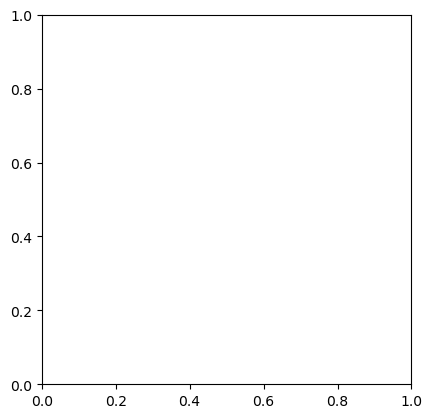

In [4]:
feature_selecter.set_filter_method('eig_theta_off')
score_off = feature_selecter.apply_filter()
fig, ax = plt.subplots(1, 1)
ax.imshow(score_off, cmap='gray')

In [ ]:
plt.hist(score_off.flatten(), bins=10)
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.title('Histogram of score_off')
plt.show()

In [ ]:
# %matplotlib qt
# expected_unstable = np.where(score_off < 40000)
# background_pixels = np.where(mean_image.T/np.max(mean_image) > 0.25)
# score_main[expected_unstable] = 0
# score_main[background_pixels] = 0
# fig, ax = plt.subplots(1, 1)
# ax.imshow(score_main.T, cmap='gray')

In [ ]:
%matplotlib qt
feature_selecter.plot_image()

In [ ]:
# %matplotlib inline
# pixel1 = (415, 533) # (y, x)
# window = feature_selecter.image[pixel1[0]-feature_selecter.roi_size[0]//2:pixel1[0]+feature_selecter.roi_size[0]//2+1, pixel1[1]-feature_selecter.roi_size[1]//2:pixel1[1]+feature_selecter.roi_size[1]//2+1]
# Xi, Xj = np.meshgrid(np.arange(window.shape[1]), np.arange(window.shape[0]))
# gi = feature_selecter.gi[pixel1[0]-feature_selecter.roi_size[0]//2:pixel1[0]+feature_selecter.roi_size[0]//2+1, pixel1[1]-feature_selecter.roi_size[1]//2:pixel1[1]+feature_selecter.roi_size[1]//2+1]
# gj = feature_selecter.gj[pixel1[0]-feature_selecter.roi_size[0]//2:pixel1[0]+feature_selecter.roi_size[0]//2+1, pixel1[1]-feature_selecter.roi_size[1]//2:pixel1[1]+feature_selecter.roi_size[1]//2+1]
# R = ((gi**2 + gj**2)**0.5).flatten()
# ATA = np.array([[np.sum(gj**2), np.sum(-gj*gi)], [np.sum(-gj*gi), np.sum(gj**2)]])
# eig_vals1, eig_vecs1 = np.linalg.eig(ATA)
# eig_vec1_0 = eig_vecs1[:,0]
# eig_vec1_1 = eig_vecs1[:,1]
# scaled_eig_vec1_0 = np.sqrt(eig_vals1[0]) * eig_vec1_0
# scaled_eig_vec1_1 = np.sqrt(eig_vals1[1]) * eig_vec1_1

# scale  = 0.1
# gi_selection = gi.flatten()[R > 5000]
# gj_selection = gj.flatten()[R > 5000]
# ATA_selection = np.array([[np.sum(gj_selection**2), np.sum(-gj_selection*gi_selection)], [np.sum(-gj_selection*gi_selection), np.sum(gj_selection**2)]])
# eig_vals1_selection, eig_vecs1_selection = np.linalg.eig(ATA_selection)
# eig_vec1_0_selection = eig_vecs1_selection[:,0]
# eig_vec1_1_selection = eig_vecs1_selection[:,1]
# scaled_eig_vec1_0_selection = np.sqrt(eig_vals1_selection[0]) * eig_vec1_0_selection
# scaled_eig_vec1_1_selection = np.sqrt(eig_vals1_selection[1]) * eig_vec1_1_selection


# fig, ax = plt.subplots(1, 3, figsize=(15, 5))
# ax[0].imshow(window, cmap='gray')
# ax[0].quiver(Xi, Xj, gj, -gi, color='r')
# ax[1].scatter(gj, -gi, color='r', s=1)
# ax[1].plot([0, scaled_eig_vec1_0[1]*scale], [0, -scaled_eig_vec1_0[0]*scale], 'b')
# ax[1].plot([0, scaled_eig_vec1_1[1]*scale], [0, -scaled_eig_vec1_1[0]*scale], 'r')
# ax[1].set_aspect('equal')

# ax[2].scatter(gj_selection, -gi_selection, color='r', s=1)
# ax[2].plot([0, scaled_eig_vec1_0_selection[1]*scale], [0, -scaled_eig_vec1_0_selection[0]*scale], 'b')
# ax[2].plot([0, scaled_eig_vec1_1_selection[1]*scale], [0, -scaled_eig_vec1_1_selection[0]*scale], 'r')
# ax[2].set_aspect('equal')

# # fig, ax = plt.subplots(1, 1)
# # plt.hist(R.flatten(), bins=10)
# # plt.xlabel('R')
# # plt.ylabel('Frequency')
# # plt.title('Histogram of R')
# # plt.show()
# print(eig_vals1, eig_vals1_selection)


5
Available filter methods: eig0, harris, trigs, harmonic_mean, eig_theta eig_theta_off
Added 500 points with a minimum radius of 13.341664064126334
6
Available filter methods: eig0, harris, trigs, harmonic_mean, eig_theta eig_theta_off
Added 500 points with a minimum radius of 13.892443989449804
7
Available filter methods: eig0, harris, trigs, harmonic_mean, eig_theta eig_theta_off
Added 500 points with a minimum radius of 13.92838827718412
8
Available filter methods: eig0, harris, trigs, harmonic_mean, eig_theta eig_theta_off
Added 500 points with a minimum radius of 13.92838827718412
9
Available filter methods: eig0, harris, trigs, harmonic_mean, eig_theta eig_theta_off
Added 500 points with a minimum radius of 13.892443989449804
10
Available filter methods: eig0, harris, trigs, harmonic_mean, eig_theta eig_theta_off
Added 500 points with a minimum radius of 14.142135623730951


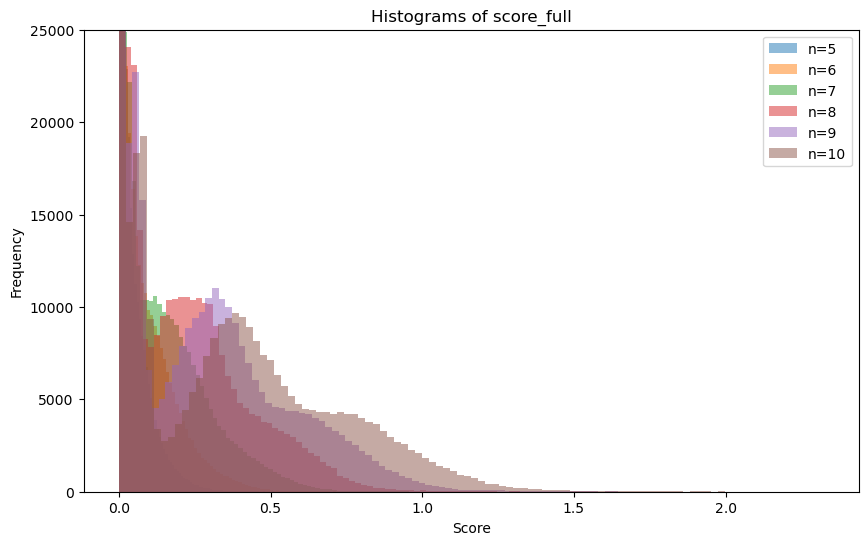

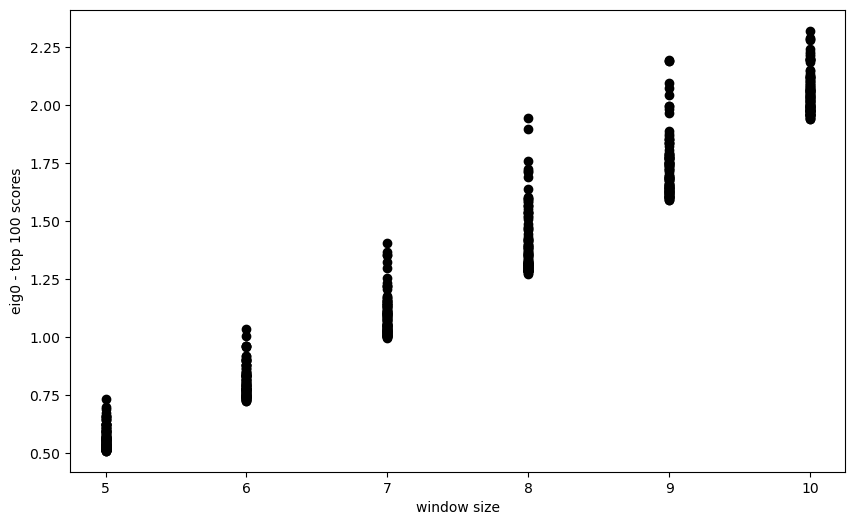

In [5]:
%matplotlib inline
n_vec = range(3, 31, 1)
fig1, ax1 = plt.subplots(figsize=(10, 6))
fig2, ax2 = plt.subplots(figsize=(10, 6))
top_scores_n = 100
top_scores = np.zeros((len(n_vec), top_scores_n))
mean_image/=np.max(mean_image)

score_images = []
points_all = []
radius_vec = []

for n_i, n in enumerate(n_vec):
    print(n)
    feature_selecter = FeatureSelecter(mean_image)
    feature_selecter.set_roi_size((n, n, 2))
    feature_selecter.set_filter_method('eig0')
    score_full = feature_selecter.apply_filter(downsample=1)
    score_images.append(score_full)
    # points = feature_selecter.pick_max_filter(min_distance=6, absolute_treshold=.8) #threshold_percentage=70
    points = feature_selecter.pick_ANMS(n_points = 500, c_robust = 0.15)
    radius_vec.append(feature_selecter.radius)
    points_all.append(points)
    ax1.hist(score_full.flatten(), bins=100, alpha=0.5, label=f'n={n}')
    top_scores[n_i] = np.sort(score_full.flatten())[-top_scores_n:]
    ax2.plot(n*np.ones(top_scores_n), top_scores[n_i], 'ko')
ax1.set_ylim([0, 25000])
ax1.set_xlabel('Score')
ax1.set_ylabel('Frequency')
ax1.set_title('Histograms of score_full')
ax1.legend()
ax2.set_xlabel('window size')
ax2.set_ylabel('eig0 - top 100 scores')
plt.show()

In [6]:
%matplotlib qt
import matplotlib.animation as animation
score_images_max = np.max(score_images[5])
fig, ax = plt.subplots(figsize=(10, 6))
# im = ax.imshow(score_images[0], cmap='gray') #, vmin=0, vmax=score_images_max
im = ax.imshow(mean_image, cmap='gray') #, vmin=0, vmax=score_images_max
text = ax.text(0.9, 0.95, '', transform=ax.transAxes, color='white')
point_plot, = ax.plot(points_all[0][:,1], points_all[0][:,0], 'r.', markersize=1)
ax.set_xticks([])
ax.set_yticks([])
def update(i):
    # im.set_array(score_images[i])
    im.set_array(mean_image)
    text.set_text(f'n={n_vec[i]}')
    point_plot.set_data(points_all[i][:,1], points_all[i][:,0])
    return im, text, point_plot

def update2(i):
    im.set_array(score_images[i])
    text.set_text(f'n={n_vec[i]}')
    point_plot.set_data(points_all[i][:,1], points_all[i][:,0])
    return im, text, point_plot

ani = animation.FuncAnimation(fig, update2, frames=len(score_images), interval=300, blit=True)
writer = animation.PillowWriter(fps=2)
ani.save(os.path.join(EMA_structure.root_simulations, 'filter', file_name + '_animation_ANMS.gif'), writer=writer)

plt.show()


In [ ]:
def analytical_mode_shape(mode_n, L, x):
    """
    Analytical mode shape for a fixed-free cantilever beam
    """
    xf = x/L
    kL_dict = {1: 1.875104, 2: 4.694041, 3: 7.854757}
    alpha = (np.cos(kL_dict[mode_n]) + np.cosh(kL_dict[mode_n]))/(np.sin(kL_dict[mode_n]) + np.sinh(kL_dict[mode_n]))
    return np.cos(kL_dict[mode_n]*xf) - np.cosh(kL_dict[mode_n]*xf) - alpha*(np.sin(kL_dict[mode_n]*xf) - np.sinh(kL_dict[mode_n]*xf))

fig, ax = plt.subplots(3, 2, figsize=(16, 6))
L = 1
x = np.linspace(0, L, 100)
mode1 = analytical_mode_shape(1, L, x)
mode2 = analytical_mode_shape(2, L, x)
mode3 = analytical_mode_shape(3, L, x)
ax[0,0].plot(x, mode1, label=f'mode 1')
ax[1,0].plot(x, mode2, label=f'mode 2')
ax[2,0].plot(x, mode3, label=f'mode 3')

n_vec = range(3, 17, 4)

pixel_size = 0.1
for n in n_vec:
    boundary_size = n // 2
    mode1_smooth = np.convolve(mode1, np.ones(n)/n, mode='same')
    mode1_smooth[:boundary_size] = np.NaN
    mode1_smooth[-boundary_size:] = np.NaN
    error1 = np.abs(mode1_smooth - mode1)
    mode2_smooth = np.convolve(mode2, np.ones(n)/n, mode='same')
    mode2_smooth[:boundary_size] = np.NaN
    mode2_smooth[-boundary_size:] = np.NaN
    error2 = np.abs(mode2_smooth - mode2)
    mode3_smooth = np.convolve(mode3, np.ones(n)/n, mode='same')
    mode3_smooth[:boundary_size] = np.NaN
    mode3_smooth[-boundary_size:] = np.NaN
    error3 = np.abs(mode3_smooth - mode3)
    
    ax[0,0].plot(x, mode1_smooth, label=f'n={n}')
    ax[1,0].plot(x, mode2_smooth, label=f'n={n}')
    ax[2,0].plot(x, mode3_smooth, label=f'n={n}')
    ax[0,1].plot(x, error1, label=f'n={n}')
    ax[1,1].plot(x, error2, label=f'n={n}')
    ax[2,1].plot(x, error3, label=f'n={n}')
    

for i in range(3):
    ax[i,0].set_xlabel('x/L')
    ax[i,0].set_ylabel('Mode shape')
    ax[i,0].legend()
    ax[i,1].set_xlabel('x/L')
    ax[i,1].set_ylabel('absolute error')
    ax[i,1].legend()
